<a href="https://www.kaggle.com/code/varun7709yy/maths-project-probability-and-statistics?scriptVersionId=229559530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
print(os.listdir('/kaggle/input'))

['pima-indians-diabetes-database']


In [2]:
# Import necessary libraries
import pandas as pd  

# Load the dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Display the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape #rows and columns

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()
#display summary statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


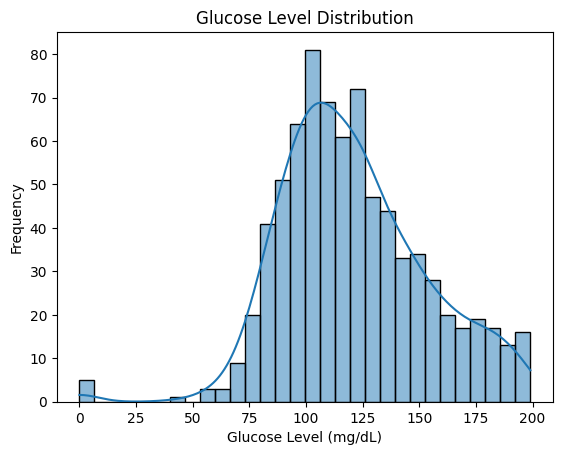

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Glucose Level Distribution
sns.histplot(df['Glucose'], kde=True, bins=30)
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose Level (mg/dL)")
plt.ylabel("Frequency")
plt.show()

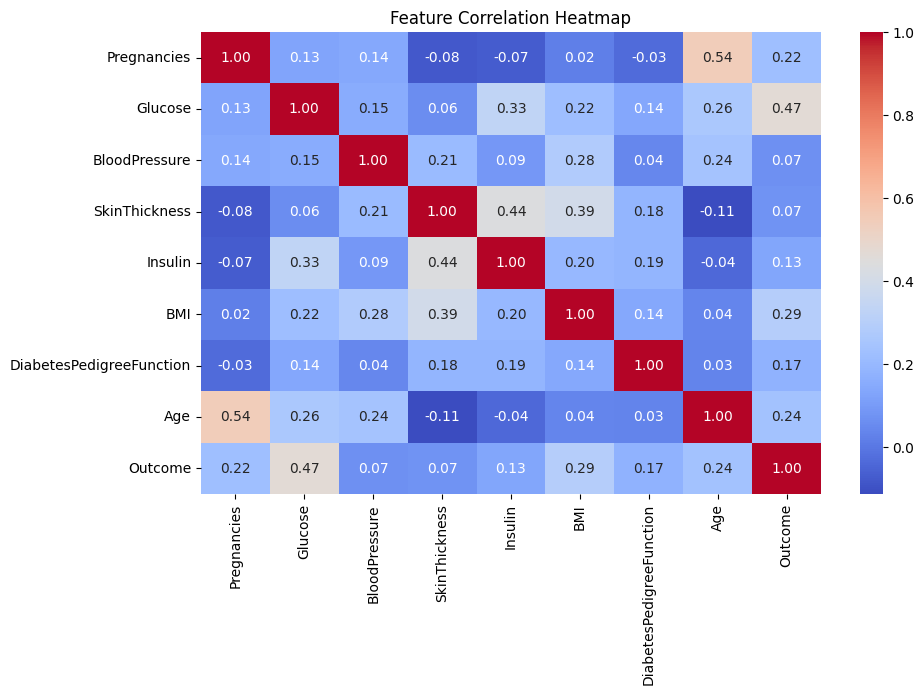

In [8]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Calculate P(Diabetes=1)
p_diabetes = df['Outcome'].mean()

# Calculate P(Glucose > 140 | Diabetes=1)
p_glucose_given_diabetes = (df[df['Outcome'] == 1]['Glucose'] > 140).mean()

# Calculate P(Glucose > 140)
p_glucose = (df['Glucose'] > 140).mean()

# Apply Bayes' Theorem
p_diabetes_given_glucose = (p_glucose_given_diabetes * p_diabetes) / p_glucose

print(f"Probability of having diabetes given high glucose levels: {p_diabetes_given_glucose:.2f}")

Probability of having diabetes given high glucose levels: 0.69


In [10]:
from scipy.stats import ttest_ind

# Split data into Diabetes (1) and No-Diabetes (0)
age_diabetes = df[df['Outcome'] == 1]['Age']
age_no_diabetes = df[df['Outcome'] == 0]['Age']

# Perform T-test
t_stat, p_value = ttest_ind(age_diabetes, age_no_diabetes)

print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Age has a significant effect on diabetes.")
else:
    print("Age does not have a significant effect on diabetes.")

T-Statistic: 6.79, P-Value: 0.0000
Age has a significant effect on diabetes.


In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Outcome'])  # All columns except 'Outcome'
y = df['Outcome']  # Target variable (0 or 1)

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (614, 8), Testing Data: (154, 8)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression Model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Check Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed Report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

